In [2]:
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import pandas as pd

import networkx as nx
# from causalgraphicalmodels import CausalGraphicalModel

import arviz as az
# ArviZ ships with style sheets!
# https://python.arviz.org/en/stable/examples/styles.html#example-styles
az.style.use("arviz-darkgrid")

import xarray as xr

import stan
import nest_asyncio

plt.style.use('default')
plt.rcParams['axes.facecolor'] = 'lightgray'

# To DAG's
import daft
from causalgraphicalmodels import CausalGraphicalModel

In [3]:
# Add fonts to matplotlib to run xkcd

from matplotlib import font_manager

font_dirs = ["fonts/"]  # The path to the custom font file.
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [4]:
# To make plots like drawing 
plt.xkcd()

In [5]:
# To running the stan in jupyter notebook
nest_asyncio.apply()

### R Code 10.1

In [6]:
buckets = {
    "A": (0, 0, 1, 0, 0),
    "B": (0, 1, 8, 1, 0),
    "C": (0, 2, 6, 2, 0),
    "D": (1, 2, 4, 2, 1),
    "E": (2, 2, 2, 2, 2),
}

df = pd.DataFrame.from_dict(buckets)
df

,A,B,C,D,E
0,0,0,0,1,2
1,0,1,2,2,2
2,1,8,6,4,2
3,0,1,2,2,2
4,0,0,0,1,2


### R Code 10.2

In [9]:
# Normalize

p_norm = df / df.sum(axis=0)
p_norm

,A,B,C,D,E
0,0.0,0.0,0.0,0.1,0.2
1,0.0,0.1,0.2,0.2,0.2
2,1.0,0.8,0.6,0.4,0.2
3,0.0,0.1,0.2,0.2,0.2
4,0.0,0.0,0.0,0.1,0.2


### R Code 10.3

In [40]:
def entropy(bucket):
    uncertainty = []
    
    for q in bucket:
        if q == 0:
            uncertainty.append(q)
        else:
            uncertainty.append(q * np.log(q))
    
    return (-1) * np.sum(uncertainty)

In [41]:
H = [entropy(p_norm[key]) for key in p_norm.keys()]

df_H = pd.DataFrame(H).T
df_H.columns = p_norm.keys()
df_H

,A,B,C,D,E
0,-0.0,0.639032,0.950271,1.470808,1.609438


### R Code 10.4

In [46]:
ways = (1, 90, 1260, 37800, 113400)

logwayspp = np.log(ways) / 10

logwayspp

array([0.        , 0.44998097, 0.7138867 , 1.05400644, 1.16386767])

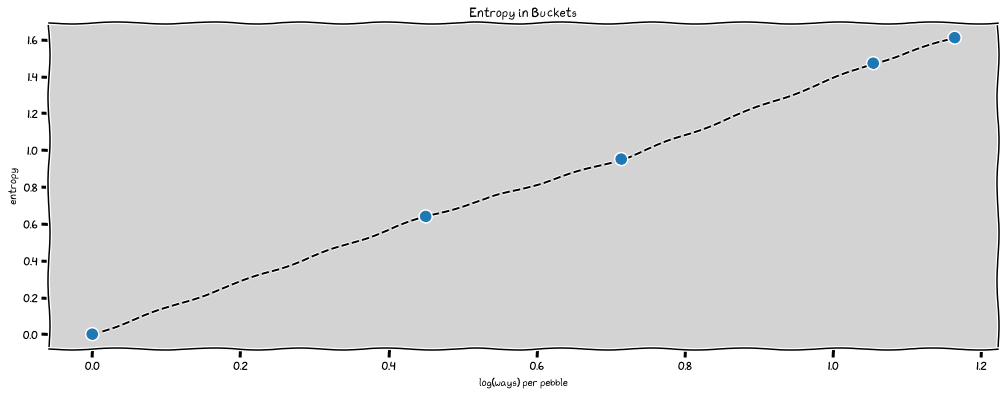

In [57]:
plt.figure(figsize=(17, 6))

plt.plot(logwayspp, df_H.T.values, '--', c='black')
plt.plot(logwayspp, df_H.T.values, 'o', ms=10)

plt.title('Entropy in Buckets')
plt.xlabel('log(ways) per pebble')
plt.ylabel('entropy')

plt.show()